Question 2. In this problem, you will train a classifier on the MNIST dataset.You can find this dataset
in TorchVision. Train a fully-connected neural network with 2 hidden layers and ReLU activations.

In [7]:
import torchvision
import os

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
import torch.utils.data as Data
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):    
    DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     
    transform=torchvision.transforms.ToTensor(),                                                   
    download=True,
)

test_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=False,                                     
    transform=torchvision.transforms.ToTensor(),                                                   
    download=True,
)


Training Data Size: torch.Size([60000, 28, 28])
Training Data Labels Size : torch.Size([60000])


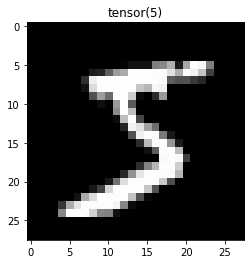

In [11]:
print("Training Data Size: {}".format(train_data.data.size()))
print("Training Data Labels Size : {}".format(train_data.targets.size()))
plt.imshow(train_data.data[0].numpy(), cmap = 'gray')
plt.title(train_data.targets[0])
plt.show()

In [24]:
## CNN with two hidden layers and Relu Activation for MNIST
## training parameters

BATCH_SIZE = 60
NUM_EPOCHS = 10
LEARNING_R = 0.001
DROPOUT_P = 0.5
num_classes = 10

seed = 1234
torch.manual_seed(seed)

In [23]:
train_data_loader = Data.DataLoader(
    dataset = train_data, 
    batch_size = BATCH_SIZE,
    shuffle = True
    ) 
test_data_loader = Data.DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)


1000

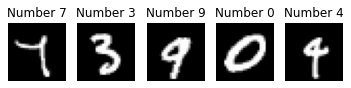

In [20]:
## Visualizing the test data
batch = next(iter(test_data_loader))
samples = batch[0][:5]
y_true = batch[1]

for i,sample in enumerate(samples):
  plt.subplot(1,5,i+1)
  plt.title("Number %i" %y_true[i])
  plt.imshow(sample.numpy().reshape((28,28)), cmap = 'gray')
  plt.axis("off")


In [15]:
## CNN Model

class CNN(nn.Module):

  def __init__(self, DROPOUT_P, num_classes):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.relu1 = nn.ReLU()
    self.maxPool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.relu2 = nn.ReLU()
    # self.dropout = nn.Dropout2d(DROPOUT_P)
    self.maxPool2 = nn.MaxPool2d(kernel_size=2)

    self.fc1 = nn.Linear(320, num_classes)

  def forward(self, x):
    
    # Convolution 1
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.maxPool1(x)

    #  Convolution 2
    x = self.conv2(x)
    x = self.relu2(x)
    x= self.maxPool2(x)

    # Flatten
    x = x.view(x.size(0), -1)
    x = self.fc1(x)

    return x


In [16]:
model = CNN(DROPOUT_P, num_classes)
# Adam Optimizer
optimizer = optim.SGD(model.parameters(), lr = LEARNING_R)
# Categorical Test and check class is it
criterion = torch.nn.CrossEntropyLoss()

In [33]:
# CNN Model Training

loss_list = []
accuracy = []
iterations = []
running_loss = 0.0
total_train = 0.0
correct_train = 0.0 

for epoch in range(NUM_EPOCHS):
  for i, (image, labels) in enumerate(train_data_loader):
    # print(i)

    train = Variable(image)
    labels = Variable(labels)
    optimizer.zero_grad()

    output = model(train)
    loss = criterion(output, labels)

    loss.backward()
    optimizer.step()

    # normalizer_train = len(train_loader.dataset)
	  # total_epoch_loss_train = loss / normalizer_train
    # print statistics
    running_loss += loss.item()
    _, predicted = torch.max(output.data,1)
    total_train += labels.size(0)
    correct_train += predicted.eq(labels.data).sum().item()
    train_accuracy = 100 * correct_train / total_train

    if i % 1000 == 999:    
        print('[%d, %5d] loss: %.3f Accuracy: %d' %
              (epoch + 1, i + 1, running_loss/1000, train_accuracy))
        loss_list.append(running_loss/1000)
        running_loss = 0.0
    

[1,  1000] loss: 0.135 Accuracy: 95
[2,  1000] loss: 0.132 Accuracy: 96
[3,  1000] loss: 0.130 Accuracy: 96
[4,  1000] loss: 0.127 Accuracy: 96
[5,  1000] loss: 0.125 Accuracy: 96
[6,  1000] loss: 0.123 Accuracy: 96
[7,  1000] loss: 0.120 Accuracy: 96
[8,  1000] loss: 0.119 Accuracy: 96
[9,  1000] loss: 0.117 Accuracy: 96
[10,  1000] loss: 0.115 Accuracy: 96


In [34]:
PATH = './mnist_net.pth'
torch.save(model.state_dict(), PATH)

In [43]:
total_test = 0.0
correct_test = 0.0
test_accuracy  = []
for epoch in range(NUM_EPOCHS):
  for i, (image, labels) in enumerate(test_data_loader):
    output = model(image)
    _, predicted = torch.max(output, 1)
    total_test += labels.size(0)
    correct_test += predicted.eq(labels.data).sum().item()
    test_accuracy.append(100 * correct_test / total_test)  
    # print(len(predicted))


1670

In [45]:
model_resnet = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [47]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    
])

In [49]:
from PIL import Image
img = Image.open('/content/dog.jpg')

(-0.5, 1187.5, 2207.5, -0.5)

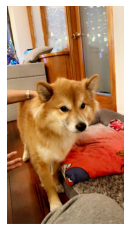

In [55]:
plt.imshow(img)
plt.axis("off")


In [61]:
transform_img = transform(img)
batch_t = torch.unsqueeze(transform_img, 0)


In [63]:
model_resnet.eval()
output = model_resnet(batch_t)

In [69]:
with open('/content/imagenet1000_clsidx_to_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]

tensor([3.8729e-05, 1.7481e-02, 8.4939e-04, 7.9850e-05, 5.1707e-04, 6.8422e-03,
        3.1827e-03, 1.4075e-03, 1.9445e-03, 5.0468e-04, 3.9395e-04, 5.9761e-05,
        3.9930e-04, 3.1625e-04, 6.8624e-05, 2.5957e-04, 2.4515e-03, 3.4252e-03,
        2.3926e-04, 9.9263e-04, 1.1057e-04, 2.4808e-04, 1.5786e-05, 1.2155e-04,
        7.3964e-05, 2.5574e-05, 6.2204e-05, 1.2942e-04, 1.1852e-04, 3.0889e-04,
        2.0745e-04, 9.3574e-04, 1.2939e-04, 6.1183e-04, 8.9062e-04, 7.7286e-05,
        7.7863e-05, 8.6414e-05, 1.2136e-04, 4.8093e-05, 1.7117e-04, 5.2460e-05,
        1.0247e-04, 1.3023e-04, 2.8981e-04, 1.7384e-04, 1.5139e-04, 3.1851e-04,
        1.4958e-05, 5.2549e-04, 1.4338e-04, 6.8873e-03, 1.8138e-04, 1.2419e-04,
        5.5197e-04, 4.1289e-04, 4.3367e-04, 2.9371e-05, 2.1359e-04, 4.2254e-04,
        7.9022e-04, 2.2033e-04, 4.7699e-04, 3.4009e-05, 2.1152e-04, 2.2602e-04,
        9.9983e-04, 3.0628e-04, 4.5116e-04, 3.6708e-05, 2.3154e-04, 2.6843e-04,
        2.5227e-05, 8.2096e-05, 2.9834e-